<a href="https://colab.research.google.com/github/andryelarossignol/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#K-Nearest Neighbors(KNN)

#works based on the similarity between the data
#Data Storage: KNN stores all the training examples.
#Distance Calculation: When a new data point needs to be classified, KNN calculates the distance between this point and all the data points in the training set.
#Selection of Nearest Neighbors: It selects the ‘k’ nearest data points (neighbors).
#Arucaccy= Number of correct predictions/Total number of predctions
#Precision= true positives/ true positives+false positives
#Recall=true positives/true positives/false negatives
#F1=precision.recall/precision+recall
#Classification: For classification, KNN assigns the most common class among the ‘k’ neighbors.For regression, it calculates the average of the values of the ‘k’ neighbors.
#Vantagens: Simplicidade, fácil de entender e implementar.
#Desvantagens: Pode ser computacionalmente caro para grandes conjuntos de dados, pois precisa calcular a distância para todos os pontos de dados.
#Confusin matrix: Shows the count of true positives, false positives, true negatives, and false negatives


In [110]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target #X: Flower features (the four measurements). Y: Flower targets, i.e. the species to which each flower belongs.


In [112]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #rando_state: ensures that the data split is the same on each code run.


In [113]:
# Set parameters for a grid search
parameters = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [114]:
# Make predictions in the test suite
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [115]:
# Get the best k from Grid Search
best_k = clf.best_params_['n_neighbors']
print(f'The best k value is: {best_k}')

The best k value is: 1


In [117]:
accuracies_by_k = {}

In [118]:
for k in range(1, 31):
    accuracies_k = []
    for i in range(30):
        # Create and fit KNN with the specific value of K
        knn_k = KNeighborsClassifier(n_neighbors=k)
        knn_k.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred_k = knn_k.predict(X_test)
        acc = accuracy_score(y_test, y_pred_k) * 100
        accuracies_k.append(acc)
        accuracies_all.append(acc)  # Armazena todas as acurácias para o box-plot

    accuracies_by_k[k] = accuracies_k

In [119]:
# Print accuracies for each k
for k, accuracies in accuracies_by_k.items():
    print(f'Accuracies for K = {k}: {accuracies}')

Accuracies for K = 1: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracies for K = 2: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracies for K = 3: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracies for K = 4: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracies for K = 5: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100

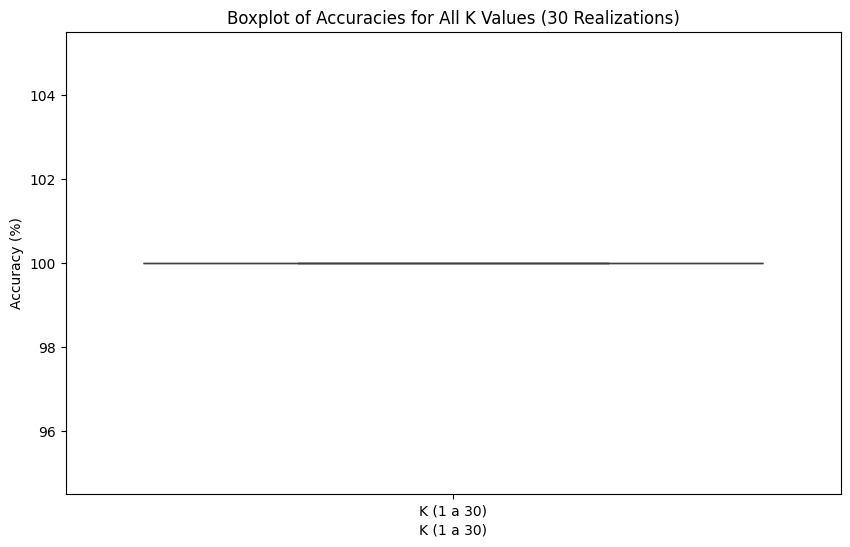

In [120]:
# Boxplot of accuracies for different values of K
plt.figure(figsize=(10, 6))
sns.boxplot(data=accuracies_all)  # Passa todas as acurácias de uma vez
plt.title('Boxplot of Accuracies for All K Values (30 Realizations)')
plt.ylabel('Accuracy (%)')
plt.xlabel('K (1 a 30)')
plt.xticks([0], ['K (1 a 30)'])  # Renomeia o eixo x para representar todos os ks juntos
plt.show()

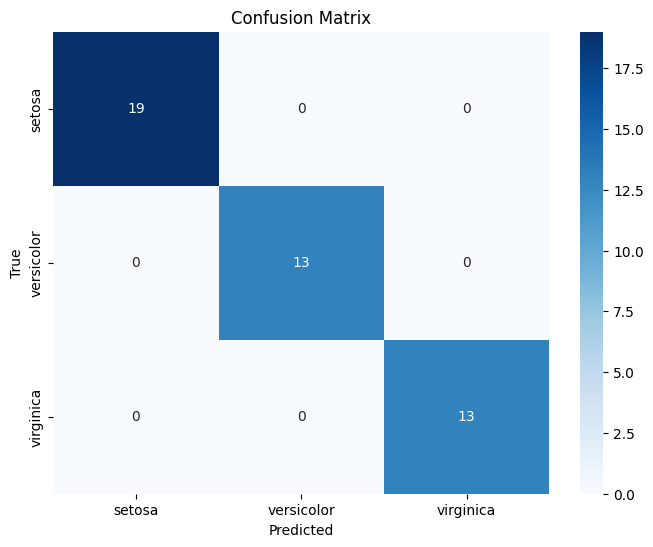

In [121]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()